In [46]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [49]:
df_ori = pd.read_csv('./encoder_len.csv', encoding='gbk')
df_ori

,start_time,model_name,detail,epoch_for_best_valid_loss,best_valid_mse_loss,recon_mse,recon_mae,learning_rate,batch size,encoder_sequence_length,...,num_layer,target_sensor,best_train_l1_loss,best_train_mse_loss,best_valid_l1_loss,train_mse_curve,valid_mse_curve,recon_error,device,model_pkl_path
0,01:59.4,DS_RNN_IIIv5_train_test,no_tem_softm,81/130,0.001337,0.003493,0.041368,0.001,64.0,5.0,...,1.0,q8,0.025813,0.001204,0.026839,"[0.0015421067657160124, 0.001465740926384936, ...","[0.0016118399857077748, 0.0016265728710485356,...","[{'MAE': 0.025184941403530045, 'MSE': 0.001158...",NaN,NaN
1,02:19.2,DS_RNN_IIIv5_train_test,no_tem_softm,61/95,0.001287,0.003359,0.041378,0.001,64.0,10.0,...,1.0,q8,0.025921,0.001218,0.026512,"[0.001476769401976139, 0.0014681891968810817, ...","[0.0016031918770539155, 0.0016163341883246017,...","[{'MAE': 0.02587249207766839, 'MSE': 0.0012096...",NaN,NaN
2,49:42.5,DS_RNN_IIIv5_train_test,no_tem_softm,65/145,0.001201,0.002741,0.038094,0.001,64.0,20.0,...,1.0,q8,0.024622,0.001080,0.025770,"[0.0014757484590598685, 0.001467766979412119, ...","[0.0016210044563774936, 0.0015986420516181142,...","[{'MAE': 0.02509788512082047, 'MSE': 0.0011368...",NaN,NaN
3,26:40.3,DS_RNN_IIIv5_train_test,no_tem_softm,53/115,0.001140,0.002378,0.035440,0.001,64.0,40.0,...,1.0,q8,0.024565,0.001083,0.024764,"[0.0015026503421528745, 0.0014716343795545296,...","[0.0016119270830118246, 0.0015973543108818863,...","[{'MAE': 0.02443258955345071, 'MSE': 0.0011171...",NaN,NaN
4,NaN,DS_RNN_IIIv5_train_test,no_tem_softm,64/145,0.001063,0.002082,0.032997,0.001,64.0,60.0,...,1.0,q8,0.023659,0.000999,0.023873,"[0.0015274886591063292, 0.0014693226856811595,...","[0.0016036646936655693, 0.0016015120866317031,...","[{'MAE': 0.023792622491489213, 'MSE': 0.001046...",NaN,NaN
5,19:00.5,DS_RNN_IIIv5_train_test,no_tem_softm,28/55,0.001280,0.002882,0.038741,0.002,64.0,80.0,...,1.0,q8,0.026151,0.001244,0.026414,"[0.0015719723737788313, 0.0014706387512200096,...","[0.0016034022898084538, 0.001604234630255686, ...","[{'MAE': 0.027027867914361996, 'MSE': 0.001334...",NaN,NaN
6,07:47.2,DS_RNN_IIIv5_train_test,no_tem_softm,9/35,0.001484,0.004520,0.046357,0.003,64.0,100.0,...,1.0,q8,0.027872,0.001442,0.028317,"[0.0021454173431266097, 0.0014679590576431817,...","[0.0016070621238802286, 0.0016064032337025685,...","[{'MAE': 0.028646985240961192, 'MSE': 0.001503...",NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,14:28.0,DS_RNN_IIv3_train_test,mid_noTsf_i=8,61/95,0.001437,0.004303,0.044981,0.001,64.0,5.0,...,1.0,q8,0.026402,0.001269,0.027744,"[0.001492714535416675, 0.0014636620741854654, ...","[0.0016133517276362649, 0.0016310572649152683,...","[{'MAE': 0.026870088819255504, 'MSE': 0.001326...",NaN,NaN
9,14:01.5,DS_RNN_IIv3_train_test,mid_noTsf_i=8,45/95,0.001363,0.003875,0.043197,0.001,64.0,10.0,...,1.0,q8,0.025964,0.001212,0.026976,"[0.0014981501176181502, 0.00145032485025338, 0...","[0.0016043734132730658, 0.0015642340261273193,...","[{'MAE': 0.026411013627601614, 'MSE': 0.001292...",NaN,NaN


In [50]:
df_ori.dropna(how='all').pivot(values='recon_mse', index='encoder_sequence_length', columns='model_name')

model_name,DSTP_RNNv9_train_test,DS_RNN_IIIv5_train_test,DS_RNN_IIv3_train_test,DS_RNNv8_train_test
encoder_sequence_length,,,,
5.0,0.004162,0.003493,0.004303,0.003824
10.0,0.003856,0.003359,0.003875,0.003291
20.0,0.003329,0.002741,0.003067,0.003030
40.0,0.002703,0.002378,0.002316,0.002368
60.0,0.005492,0.002082,0.002120,0.002166
80.0,0.005491,0.002882,0.002254,0.002554
100.0,0.005492,0.004520,0.005407,0.005491


In [53]:
df.columns

Index(['DSTP_RNNv9_train_test', 'DS_RNN_IIIv5_train_test',
       'DS_RNN_IIv3_train_test', 'DS_RNNv8_train_test'],
      dtype='object', name='model_name')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


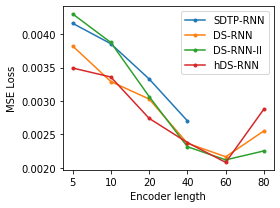

In [58]:
df = df_ori.dropna(how='all').pivot(values='recon_mse', index='encoder_sequence_length', columns='model_name').copy()
plt.figure(figsize=(4,3), facecolor='w')
columns = ['DSTP_RNNv9_train_test', 
           'DS_RNNv8_train_test',
           'DS_RNN_IIv3_train_test', 
           'DS_RNN_IIIv5_train_test']           
for i, column in enumerate(columns):
    if i > 0:
        plt.plot(list(df[column])[0:-1],'.-')
    else:
        plt.plot(list(df[column])[0:-3],'.-')
plt.legend(list(df.columns))
# plt.legend(['DS-RNN', 'DS-RNN-II', 'DSTP-RNN', 'dSTA-RNN'])
plt.xticks(range(0,6),[int(i) for i in list(df.index)])
plt.xlabel('Encoder length')
plt.ylabel('MSE Loss')
# plt.yticks(np.linspace(0.002, 0.004, 3))
# plt.xticklabels([1,2,3,4])
plt.legend(['SDTP-RNN', 'DS-RNN', 'DS-RNN-II','hDS-RNN'])
plt.tight_layout()

# plt.ylim(0, 0.01)
# plt.savefig('./mse_vs_encoderlen.png', format='png')
plt.savefig('./mse_vs_encoderlen.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


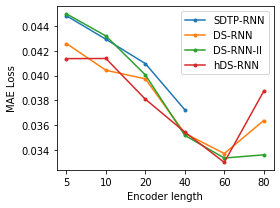

In [59]:
df = df_ori.dropna(how='all').pivot(values='recon_mae', index='encoder_sequence_length', columns='model_name').copy()
plt.figure(figsize=(4,3), facecolor='w')
columns = ['DSTP_RNNv9_train_test', 
           'DS_RNNv8_train_test',
           'DS_RNN_IIv3_train_test', 
           'DS_RNN_IIIv5_train_test']           
for i, column in enumerate(columns):
    if i > 0:
        plt.plot(list(df[column])[0:-1],'.-')
    else:
        plt.plot(list(df[column])[0:-3],'.-')
plt.legend(list(df.columns))
# plt.legend(['DS-RNN', 'DS-RNN-II', 'DSTP-RNN', 'dSTA-RNN'])
plt.xticks(range(0,6),[int(i) for i in list(df.index)])
# plt.yticks(np.linspace(0.03, 0.04, 2))
plt.xlabel('Encoder length')
plt.ylabel('MAE Loss')
# plt.xticklabels([1,2,3,4])
plt.legend(['SDTP-RNN', 'DS-RNN', 'DS-RNN-II','hDS-RNN'])
plt.tight_layout()
# plt.ylim(0, 0.01)
# plt.savefig('./mae_vs_encoderlen.png', format='png')
plt.savefig('./mae_vs_encoderlen.eps', format='eps')
plt.show()